# Group Project

In [22]:
library(tidyverse) 
library(GGally)

In [18]:
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
download.file(players_url, "players.csv")
players_data <- read_csv("players.csv")

players_data_edit <- players_data |> 
    select(experience, played_hours, gender, age) 

# sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
# download.file(sessions_url, "sessions.csv")
# sessions_data <- read_csv("sessions.csv")

# sessions_data_edit <- sessions_data |>
    # select(start_time, end_time, original_start_time, original_end_time)

players_data_edits <- players_data_edit |>
    filter(played_hours > 0) 
    
players_data_edits

players_log_scaled <- players_data_edits |>
    mutate(log_scaled_hours = log(played_hours))

players_numeric <- mutate(players_data_edits, experience_num_unordered = as.numeric(as.factor(experience))) |>
    mutate(experience_num = case_when(
        experience_num_unordered == 1 ~ 1,
        experience_num_unordered == 2 ~ 0,
        experience_num_unordered == 3 ~ 3,
        experience_num_unordered == 4 ~ 2,
        experience_num_unordered == 5 ~ 4)) |>
    select(played_hours, age, experience_num)

players_numeric

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Amateur,0.7,Female,21
Regular,0.1,Male,21
Amateur,0.1,Male,17
Veteran,1.6,Female,23
Beginner,1.5,Female,25
Amateur,0.2,Male,22
Amateur,48.4,Female,17


played_hours,age,experience_num
<dbl>,<dbl>,<dbl>
30.3,9,3
3.8,17,4
0.7,21,1
0.1,21,2
0.1,17,1
1.6,23,4
1.5,25,0
0.2,22,1
48.4,17,1


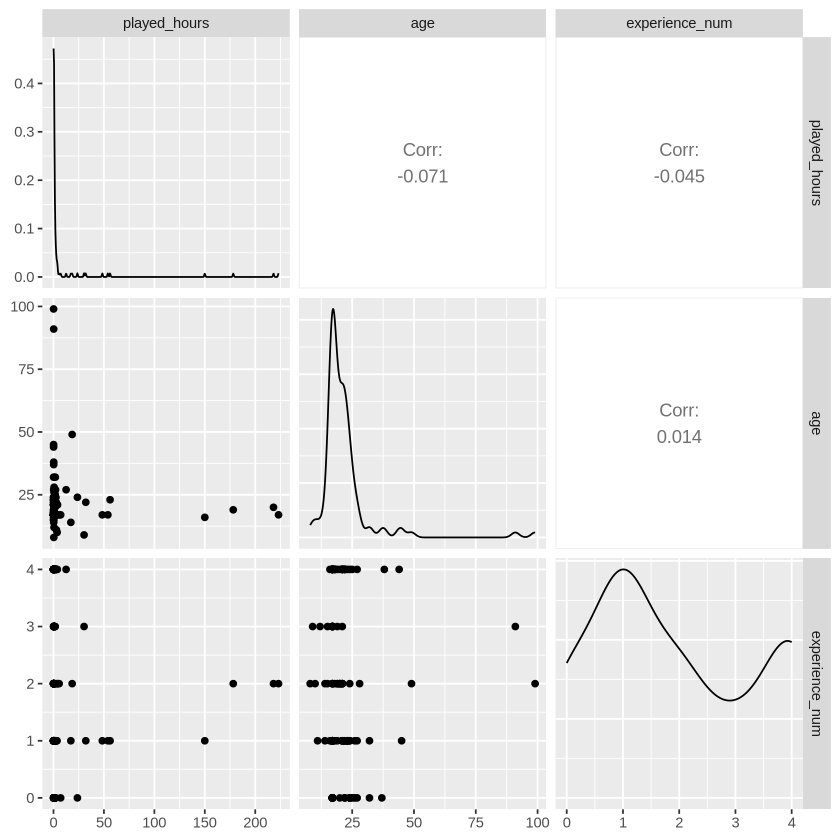

In [20]:
initial_plot <- ggpairs(players_numeric)
initial_plot